In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import ppscore as pps
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import  GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import (f1_score, roc_auc_score, precision_recall_curve, 
                            roc_curve, confusion_matrix, classification_report, 
                            accuracy_score)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import joblib


from warnings import filterwarnings

filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
pd.set_option("display.max_rows",400)

In [4]:
df = pd.read_csv("user_loggedin.csv")
df

,id,eventname,component,action,target,objecttable,crud,edulevel,userid,courseid,relateduserid,other,timecreated,datetimecreated,datecreated,hour,day,origin,ip,realuserid,usr_id,usr_username,usr_idnumber,usr_firstname,usr_lastname,usr_email,cur_id,cur_idnumber,cur_shortname,cur_fullname,cur_category,cur_startdate,cur_enddate,prog_id,prog_idnumber,prog_programa,fac_idnumber,fac_facultad
0,50521214,\core\event\user_loggedin,core,loggedin,user,user,r,0,11030,0,NaN,"{""username"":""1067961785""}",1659330101,2022-08-01 00:01:00,2022-08-01,0,2,web,191.95.35.99,NaN,11030,1067961785,P000082235,EDER JOSE,ORTEGA MEJIA,Eortegamejia61@correo.unicordoba.edu.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERÍA AMBIENTAL,NaN,NaN
1,50521243,\core\event\user_loggedin,core,loggedin,user,user,r,0,2389,0,NaN,"{""username"":""1003407708""}",1659331482,2022-08-01 00:24:00,2022-08-01,0,2,web,74.82.18.172,NaN,2389,1003407708,P000125300,JORGE LUIS,GALVAN GONZALEZ,jorlugalgo@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERÍA AMBIENTAL,NaN,NaN
2,50521254,\core\event\user_loggedin,core,loggedin,user,user,r,0,8864,0,NaN,"{""username"":""1007781154""}",1659332613,2022-08-01 00:43:00,2022-08-01,0,2,web,201.219.209.89,NaN,8864,1007781154,P000105807,IVAN RAFAEL,GOMEZ PEREZ,igomezperez@correo.unicordoba.edu.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERÍA AMBIENTAL,NaN,NaN
3,50521290,\core\event\user_loggedin,core,loggedin,user,user,r,0,24264,0,NaN,"{""username"":""1003502123""}",1659333208,2022-08-01 00:53:00,2022-08-01,0,2,web,191.95.36.63,NaN,24264,1003502123,P000160015,MARBELIS,ALVAREZ PEÑATES,marbelalvarez112018@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Licenciatura En Educación Infantil,NaN,NaN
4,50521308,\core\event\user_loggedin,core,loggedin,user,user,r,0,14693,0,NaN,"{""username"":""1067939810""}",1659333725,2022-08-01 01:02:00,2022-08-01,1,2,web,179.12.132.82,NaN,14693,1067939810,P000082312,JEAN PAUL,QUINTERO MARTÍNEZ,jpqm.usik1010@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERÍA MECÁNICA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475948,58824304,\core\event\user_loggedin,core,loggedin,user,user,r,0,9872,0,NaN,"{""username"":""1003289932""}",1668574687,2022-11-15 23:58:00,2022-11-15,23,3,web,191.108.148.18,NaN,9872,1003289932.0,P000108449,MARIA JOSE,VARGAS YANES,mariavargasyanes21@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIC EN LITERATURA Y LENGUA CASTELLANA,NaN,NaN
475949,58824332,\core\event\user_loggedin,core,loggedin,user,user,r,0,9723,0,NaN,"{""username"":""1003458536""}",1668574704,2022-11-15 23:58:00,2022-11-15,23,3,web,179.19.198.38,NaN,9723,1003458536.0,P000124770,JHON JAVIER,MARTINEZ TORRES,jhon.martinez749@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INGENIERÍA MECÁNICA,NaN,NaN
475950,58824373,\core\event\user_loggedin,core,loggedin,user,user,r,0,21153,0,NaN,"{""username"":""1003646366""}",1668574735,2022-11-15 23:58:00,2022-11-15,23,3,web,191.95.19.125,NaN,21153,1003646366.0,P000136281,ISA KATERINE,FIGUEROA LOPEZ,ifigueroalopez@correo.unicordoba.edu.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Administración en Salud,NaN,NaN
475951,58824415,\core\event\user_loggedin,core,loggedin,user,user,r,0,9822,0,NaN,"{""username"":""1003000271""}",1668574755,2022-11-15 23:59:00,2022-11-15,23,3,web,191.95.143.31,NaN,9822,1003000271.0,P000109214,JESUS DAVID,TORRES TORDECILLA,jesusdavidtorrest@gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIC EN LITERATURA Y LENGUA CASTELLANA,NaN,NaN


In [5]:
df.columns = df.columns.str.upper()

In [6]:
df.columns

Index(['ID', 'EVENTNAME', 'COMPONENT', 'ACTION', 'TARGET', 'OBJECTTABLE',
       'CRUD', 'EDULEVEL', 'USERID', 'COURSEID', 'RELATEDUSERID', 'OTHER',
       'TIMECREATED', 'DATETIMECREATED', 'DATECREATED', 'HOUR', 'DAY',
       'ORIGIN', 'IP', 'REALUSERID', 'USR_ID', 'USR_USERNAME', 'USR_IDNUMBER',
       'USR_FIRSTNAME', 'USR_LASTNAME', 'USR_EMAIL', 'CUR_ID', 'CUR_IDNUMBER',
       'CUR_SHORTNAME', 'CUR_FULLNAME', 'CUR_CATEGORY', 'CUR_STARTDATE',
       'CUR_ENDDATE', 'PROG_ID', 'PROG_IDNUMBER', 'PROG_PROGRAMA',
       'FAC_IDNUMBER', 'FAC_FACULTAD'],
      dtype='object')

In [7]:
#Con este método cambiamos el nombre a las columnas
df.rename(columns={"ID" : "IDENTIFICACION" ,
           "USR_ID" : "ID_USUARIO" ,
           "USR_USERNAME" : "CEDULA",
           "USR_IDNUMBER" : "CÓDIGO ESTUDIANTE",
           "USR_FIRSTNAME" : "NOMBRES",
           "USR_LASTNAME" : "APELLIDOS",
           "USR_EMAIL" : "EMAIL",
           "PROG_PROGRAMA" : "PROGRAMA"} ,inplace=True)

In [8]:
df.shape # Número de filas y columnas

(475953, 38)

In [9]:
df.describe().round(2)

,IDENTIFICACION,EDULEVEL,USERID,COURSEID,RELATEDUSERID,TIMECREATED,HOUR,DAY,REALUSERID,ID_USUARIO,CUR_ID,CUR_IDNUMBER,CUR_SHORTNAME,CUR_FULLNAME,CUR_CATEGORY,CUR_STARTDATE,CUR_ENDDATE,PROG_ID,PROG_IDNUMBER,FAC_IDNUMBER,FAC_FACULTAD
count,475953.00,475953.0,475953.00,475953.0,0.0,4.759530e+05,475953.00,475953.00,0.0,475953.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,55094879.33,0.0,12927.86,0.0,NaN,1.664944e+09,14.32,3.91,NaN,12927.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2170322.71,0.0,8150.97,0.0,NaN,2.098326e+06,5.10,1.86,NaN,8150.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,50521214.00,0.0,2.00,0.0,NaN,1.659330e+09,0.00,1.00,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,53245253.00,0.0,5691.00,0.0,NaN,1.663287e+09,10.00,2.00,NaN,5691.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,55139743.00,0.0,12832.00,0.0,NaN,1.664817e+09,14.00,4.00,NaN,12832.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,56961477.00,0.0,20613.00,0.0,NaN,1.666896e+09,19.00,5.00,NaN,20613.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,58824449.00,0.0,25431.00,0.0,NaN,1.668575e+09,23.00,7.00,NaN,25431.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#df.fillna(2) #remplazamos valores nan

In [11]:
data_na = (df.isnull().sum() / df.shape[0]) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(15)

,Missing Ratio
RELATEDUSERID,100.000000
REALUSERID,100.000000
CUR_ID,100.000000
CUR_IDNUMBER,100.000000
CUR_SHORTNAME,100.000000
CUR_FULLNAME,100.000000
CUR_CATEGORY,100.000000
CUR_STARTDATE,100.000000
CUR_ENDDATE,100.000000
PROG_ID,100.000000


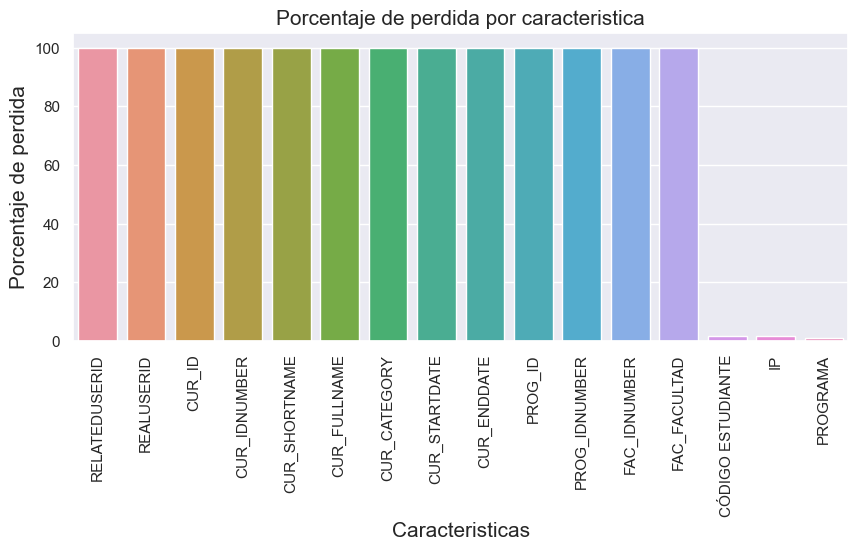

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na)
plt.xlabel('Caracteristicas', fontsize=15)
plt.ylabel('Porcentaje de perdida', fontsize=15)
plt.title('Porcentaje de perdida por caracteristica', fontsize=15);

In [13]:
#obervamos los valores nulos
df.isnull().sum()

IDENTIFICACION            0
EVENTNAME                 0
COMPONENT                 0
ACTION                    0
TARGET                    0
OBJECTTABLE               0
CRUD                      0
EDULEVEL                  0
USERID                    0
COURSEID                  0
RELATEDUSERID        475953
OTHER                     0
TIMECREATED               0
DATETIMECREATED           0
DATECREATED               0
HOUR                      0
DAY                       0
ORIGIN                    0
IP                     8204
REALUSERID           475953
ID_USUARIO                0
CEDULA                    0
CÓDIGO ESTUDIANTE      8480
NOMBRES                   0
APELLIDOS                 0
EMAIL                     0
CUR_ID               475953
CUR_IDNUMBER         475953
CUR_SHORTNAME        475953
CUR_FULLNAME         475953
CUR_CATEGORY         475953
CUR_STARTDATE        475953
CUR_ENDDATE          475953
PROG_ID              475953
PROG_IDNUMBER        475953
PROGRAMA            

In [14]:
df.columns

Index(['IDENTIFICACION', 'EVENTNAME', 'COMPONENT', 'ACTION', 'TARGET',
       'OBJECTTABLE', 'CRUD', 'EDULEVEL', 'USERID', 'COURSEID',
       'RELATEDUSERID', 'OTHER', 'TIMECREATED', 'DATETIMECREATED',
       'DATECREATED', 'HOUR', 'DAY', 'ORIGIN', 'IP', 'REALUSERID',
       'ID_USUARIO', 'CEDULA', 'CÓDIGO ESTUDIANTE', 'NOMBRES', 'APELLIDOS',
       'EMAIL', 'CUR_ID', 'CUR_IDNUMBER', 'CUR_SHORTNAME', 'CUR_FULLNAME',
       'CUR_CATEGORY', 'CUR_STARTDATE', 'CUR_ENDDATE', 'PROG_ID',
       'PROG_IDNUMBER', 'PROGRAMA', 'FAC_IDNUMBER', 'FAC_FACULTAD'],
      dtype='object')

In [15]:
#nos quedaremos con la columnas que no presentan datos nan y las que tienen poco porcentaje de perdida
df = df[['IDENTIFICACION', 'EVENTNAME', 'COMPONENT', 'ACTION', 'TARGET',
       'OBJECTTABLE', 'CRUD', 'EDULEVEL', 'USERID', 'COURSEID',
        'RELATEDUSERID', 'TIMECREATED', 'DATETIMECREATED',
       'DATECREATED', 'HOUR', 'DAY', 'ORIGIN', 'IP',
       'ID_USUARIO', 'CEDULA', 'CÓDIGO ESTUDIANTE', 'NOMBRES',
       'APELLIDOS', 'EMAIL', 'PROGRAMA']]


In [16]:
df.columns #Esta función nos permite visualizar todas las columnas

Index(['IDENTIFICACION', 'EVENTNAME', 'COMPONENT', 'ACTION', 'TARGET',
       'OBJECTTABLE', 'CRUD', 'EDULEVEL', 'USERID', 'COURSEID',
       'RELATEDUSERID', 'TIMECREATED', 'DATETIMECREATED', 'DATECREATED',
       'HOUR', 'DAY', 'ORIGIN', 'IP', 'ID_USUARIO', 'CEDULA',
       'CÓDIGO ESTUDIANTE', 'NOMBRES', 'APELLIDOS', 'EMAIL', 'PROGRAMA'],
      dtype='object')

In [17]:
#normalizamos y mostramos las facultades de nuestro dataset
df['PROGRAMA'] = df["PROGRAMA"].str.upper()

In [18]:
df["PROGRAMA"].value_counts()

ADMINIS. EN FINANZAS Y NEGOCIOS INTERNAC                                                 80563
ADMINISTRACIÓN EN SALUD                                                                  49156
INGENIERÍA DE SISTEMAS                                                                   47583
INGENIERÍA INDUSTRIAL                                                                    26707
LICENCIATURA EN INFORMATICA                                                              20903
LICENCIATURA EN EDUCACION INFANTIL                                                       19014
INGENIERÍA AMBIENTAL                                                                     17245
INGENIERÍA MECÁNICA                                                                      17243
MEDICINA VETERINARIA Y ZOOTECNIA                                                         14089
INGENIERÍA DE ALIMENTOS                                                                  12487
INGENIERÍA AGRONÓMICA                             

In [19]:
df.PROGRAMA.unique()

array(['INGENIERÍA AMBIENTAL', 'LICENCIATURA EN EDUCACIÓN INFANTIL',
       'INGENIERÍA MECÁNICA', 'QUÍMICA', 'ADMINISTRACIÓN EN SALUD',
       'ACUICULTURA', 'DPTO DE INGENIERÍA AMBIENTAL',
       'LIC EN LITERATURA Y LENGUA CASTELLANA', 'INGENIERÍA DE ALIMENTOS',
       'MEDICINA VETERINARIA Y ZOOTECNIA', 'INGENIERÍA DE SISTEMAS',
       'DEPARTAMENTO DE INGENIERIA DE ALIMENTOS', 'MATEMÁTICAS',
       'DEPARTAMENTO DE QUÍMICA',
       'ADMINIS. EN FINANZAS Y NEGOCIOS INTERNAC', 'FÍSICA', 'GEOGRAFÍA',
       'INGENIERÍA INDUSTRIAL', 'DPTO CIENCIAS ADMINISTRATIVAS',
       'INGENIERÍA AGRONÓMICA', 'DEPARTAMENTO DE CIENCIAS PECUARÍAS',
       'DEPARTAMENTO DE GEOGRAFÍA Y MEDIO AMBIEN',
       'LIC EN LENGUAS EXTRAN CON ENFA EN INGLES',
       'DEPARTAMENTO DE IDIOMAS EXTRANJEROS',
       'DEPARTAMENTO DE INFORMÁTICA EDUCATIVA',
       'LICENCIATURA EN EDUCACION INFANTIL', 'ENFERMERÍA',
       'DPTO DE ING DE SISTEMAS Y TELECOMUNICACI', 'DERECHO',
       'LICENCIATURA EN INFORMATICA',
  

In [20]:
#con este código podemos seleccionar las columnas que deseamos ver
df

,IDENTIFICACION,EVENTNAME,COMPONENT,ACTION,TARGET,OBJECTTABLE,CRUD,EDULEVEL,USERID,COURSEID,RELATEDUSERID,TIMECREATED,DATETIMECREATED,DATECREATED,HOUR,DAY,ORIGIN,IP,ID_USUARIO,CEDULA,CÓDIGO ESTUDIANTE,NOMBRES,APELLIDOS,EMAIL,PROGRAMA
0,50521214,\core\event\user_loggedin,core,loggedin,user,user,r,0,11030,0,NaN,1659330101,2022-08-01 00:01:00,2022-08-01,0,2,web,191.95.35.99,11030,1067961785,P000082235,EDER JOSE,ORTEGA MEJIA,Eortegamejia61@correo.unicordoba.edu.co,INGENIERÍA AMBIENTAL
1,50521243,\core\event\user_loggedin,core,loggedin,user,user,r,0,2389,0,NaN,1659331482,2022-08-01 00:24:00,2022-08-01,0,2,web,74.82.18.172,2389,1003407708,P000125300,JORGE LUIS,GALVAN GONZALEZ,jorlugalgo@gmail.com,INGENIERÍA AMBIENTAL
2,50521254,\core\event\user_loggedin,core,loggedin,user,user,r,0,8864,0,NaN,1659332613,2022-08-01 00:43:00,2022-08-01,0,2,web,201.219.209.89,8864,1007781154,P000105807,IVAN RAFAEL,GOMEZ PEREZ,igomezperez@correo.unicordoba.edu.co,INGENIERÍA AMBIENTAL
3,50521290,\core\event\user_loggedin,core,loggedin,user,user,r,0,24264,0,NaN,1659333208,2022-08-01 00:53:00,2022-08-01,0,2,web,191.95.36.63,24264,1003502123,P000160015,MARBELIS,ALVAREZ PEÑATES,marbelalvarez112018@gmail.com,LICENCIATURA EN EDUCACIÓN INFANTIL
4,50521308,\core\event\user_loggedin,core,loggedin,user,user,r,0,14693,0,NaN,1659333725,2022-08-01 01:02:00,2022-08-01,1,2,web,179.12.132.82,14693,1067939810,P000082312,JEAN PAUL,QUINTERO MARTÍNEZ,jpqm.usik1010@gmail.com,INGENIERÍA MECÁNICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475948,58824304,\core\event\user_loggedin,core,loggedin,user,user,r,0,9872,0,NaN,1668574687,2022-11-15 23:58:00,2022-11-15,23,3,web,191.108.148.18,9872,1003289932.0,P000108449,MARIA JOSE,VARGAS YANES,mariavargasyanes21@gmail.com,LIC EN LITERATURA Y LENGUA CASTELLANA
475949,58824332,\core\event\user_loggedin,core,loggedin,user,user,r,0,9723,0,NaN,1668574704,2022-11-15 23:58:00,2022-11-15,23,3,web,179.19.198.38,9723,1003458536.0,P000124770,JHON JAVIER,MARTINEZ TORRES,jhon.martinez749@gmail.com,INGENIERÍA MECÁNICA
475950,58824373,\core\event\user_loggedin,core,loggedin,user,user,r,0,21153,0,NaN,1668574735,2022-11-15 23:58:00,2022-11-15,23,3,web,191.95.19.125,21153,1003646366.0,P000136281,ISA KATERINE,FIGUEROA LOPEZ,ifigueroalopez@correo.unicordoba.edu.co,ADMINISTRACIÓN EN SALUD
475951,58824415,\core\event\user_loggedin,core,loggedin,user,user,r,0,9822,0,NaN,1668574755,2022-11-15 23:59:00,2022-11-15,23,3,web,191.95.143.31,9822,1003000271.0,P000109214,JESUS DAVID,TORRES TORDECILLA,jesusdavidtorrest@gmail.com,LIC EN LITERATURA Y LENGUA CASTELLANA


In [21]:
df.DAY.replace({1:"LUNES",2:"MARTES",3:"MIERCOLES",4:"JUEVES",5:"VIERNES",6:"SABADO",7:"DOMINGO"}, inplace=True)

In [22]:
df.dtypes

IDENTIFICACION         int64
EVENTNAME             object
COMPONENT             object
ACTION                object
TARGET                object
OBJECTTABLE           object
CRUD                  object
EDULEVEL               int64
USERID                 int64
COURSEID               int64
RELATEDUSERID        float64
TIMECREATED            int64
DATETIMECREATED       object
DATECREATED           object
HOUR                   int64
DAY                   object
ORIGIN                object
IP                    object
ID_USUARIO             int64
CEDULA                object
CÓDIGO ESTUDIANTE     object
NOMBRES               object
APELLIDOS             object
EMAIL                 object
PROGRAMA              object
dtype: object

In [23]:
df.ORIGIN.unique()

array(['web', 'cli'], dtype=object)

In [24]:
df.drop(["EVENTNAME","COMPONENT","ACTION","TARGET","OBJECTTABLE","CRUD","EDULEVEL","USERID","COURSEID","RELATEDUSERID"], axis=1, inplace=True)

In [26]:
df.to_csv("cintia.csv",sep=";", index=False)

In [27]:
df.columns

Index(['IDENTIFICACION', 'TIMECREATED', 'DATETIMECREATED', 'DATECREATED',
       'HOUR', 'DAY', 'ORIGIN', 'IP', 'ID_USUARIO', 'CEDULA',
       'CÓDIGO ESTUDIANTE', 'NOMBRES', 'APELLIDOS', 'EMAIL', 'PROGRAMA'],
      dtype='object')

In [23]:
#df["IDENTIFICACION","TIMECREATED","ORIGIN","PROGRAMA","DAY","HOUR"]

In [24]:
def get_X_y(df, y_name):
  """
  Divide un DataFrame en X (características) e y (variable de respuesta)
  Parámetros
  ----------
  df : DataFrame
      Un DataFrame que tiene las características de la columna.
  y_name : str
      El nombre de la variable de destino en el DataFrame.

  Devuelve
  -------
  X : DataFrame
      DataFrame con las características utilizadas para predecir y.
  y : Array(int)
      Array con los valores de la variable de respuesta.
  """
  y=[y_name]
  X=[col for col in df.columns if col not in y]
  y=df[y].copy().values.flatten()
  X=pd.get_dummies(df[X].copy())
  return X, y


def data_preprocessing_up_or_down_sample(X, y, sample="up", test_size=0.2):
  """
  Aplica el muestreo descendente o el muestreo ascendente, y devuelve la división Train-Test 
  de los datos.
  Parámetros
  ----------
  X : DataFrame
      DataFrame con las características utilizadas para predecir y.
  y : Array(int)
      Array con los valores de la variable de respuesta.
  sample : str(opcional)
      Elige el método a aplicar. Downsampling ("down"), 
      upsampling ("up") o ningún método (cualquier otro). Por defecto es "up". 
  test_size : float(opcional)
      Establece el parámetro test_size de sklearn.model_selection.train_test_split.
      Por defecto es 0.2
  
  Devuelve
  -------
  división : lista, longitud=2 * len(arrays)
      Lista que contiene la división train-test de las entradas, con el método definido por
      el parámetro sample aplicado.
  """

  # Utilice el parámetro de muestra para definir las variables locales para seleccionar el 
  # método
  a,b=0,0
  if sample=="up": 
    a,b=1,0
  if sample=="down":
    a,b=0,1 

  
  # Aplicar el normal train_test_split a los datos
  X_train, X_test, y_train, y_test = train_test_split( X, y, \
                                        test_size=test_size)
  # Usando las variables locales a y b, aplique downsampling o upsampling sólo
  # si el parámetro de muestreo es "up" o "down".

  if a+b>=1:
    X_train_temp, y_train_temp = resample(X_train[y_train == a],
                                    y_train[y_train == a],
                                    n_samples=X_train[y_train == b].shape[0])
    X_train = np.concatenate((X_train[y_train == b], X_train_temp))
    y_train = np.concatenate((y_train[y_train == b], y_train_temp))
  return (X_train, X_test, y_train, y_test)

def plot_roc_conf_matrix(y_test,X_test, model, model_name):
  """
  Imprime el informe de clasificación y la matriz de confusión 
  para un modelo determinado.

  Argumentos
  ---------
  y_test : {matriz dispersa tipo array} de forma (n_muestras, n_características)
      Valores objetivo
  X_test : {matriz dispersa similar a un array} de forma (n_muestras, n_características)
      Valores de entrada
  modelo : objeto estimador.
      Ya sea de las interfaces sklearn o keras
  model_name : str
      Nombre del modelo. Se utiliza como parte de los títulos del gráfico
  
  """
  try:
    y_pred=model.predict_classes(X_test)
  except:
    y_pred=model.predict(X_test)
  cm = metrics.confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
  plt.title(model_name+ " - Matriz de confusión", y=1.1, \
            fontdict={"fontsize": 21})
  plt.xlabel("Predicted", fontdict={"fontsize": 14})
  plt.ylabel("Actual", fontdict={"fontsize": 14})
 
  print(classification_report(y_test, y_pred))
  plt.subplot(1,2,2)


def apply_model_to_df(data, model, model_name):
  """
  Aplica un estimador sklearn a un DataFrame. 
  Devuelve un modelo ajustado y muestra información relevante del
  rendimiento del modelo (le aplica la función plot_roc_conf_matrix)

  Parámetros
  ----------
  datos : Lista de arrays
      Lista de arrays, equivalente a la salida de la función
      sklearn.model_selection.train_test_split  
  model : objeto estimador.
      Puede ser de las interfaces sklearn o keras
  model_name : str
      Nombre del modelo. Se utiliza como parte de los títulos del gráfico.
  
  Devuelve
  -------
  model : instancia de estimador
      Clasificador ajustado o una tubería ajustada en la que el último estimador 
      es un clasificador.
  """
  X_train, X_test, y_train, y_test=data
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  plot_roc_conf_matrix(y_test,X_test, model, model_name)
  return model

In [25]:
X,y=get_X_y(df[["IDENTIFICACION","TIMECREATED","ORIGIN","PROGRAMA","DAY","HOUR"]], "DAY")
# Se crean conjuntos para probar upsampling, downsampling y sin pre-procesado
data_up = data_preprocessing_up_or_down_sample(X, y ,"up", test_size=0.2)
data_down = data_preprocessing_up_or_down_sample(X, y ,"down", test_size=0.2)
data_as_is= data_preprocessing_up_or_down_sample(X, y ,"None", test_size=0.2)

              precision    recall  f1-score   support

     DOMINGO       0.96      0.95      0.96      9831
      JUEVES       0.96      0.96      0.96     14458
       LUNES       0.96      0.96      0.96     10598
      MARTES       0.96      0.96      0.96     15725
   MIERCOLES       0.96      0.97      0.96     16376
      SABADO       0.96      0.96      0.96     13555
     VIERNES       0.96      0.96      0.96     14648

    accuracy                           0.96     95191
   macro avg       0.96      0.96      0.96     95191
weighted avg       0.96      0.96      0.96     95191



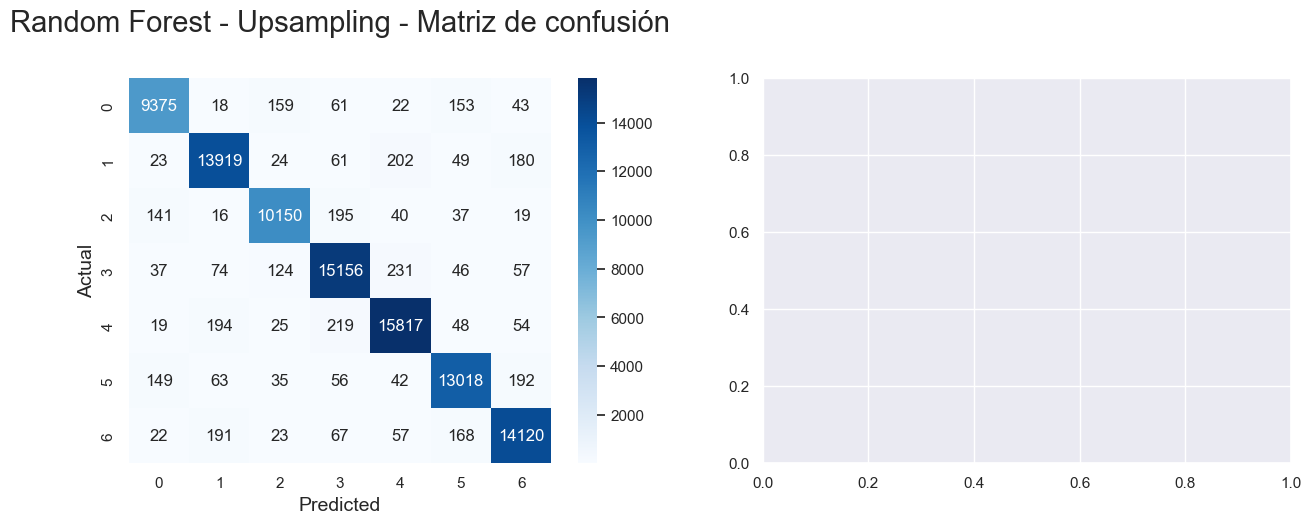

In [26]:
rf_asis=apply_model_to_df(data_as_is,RandomForestClassifier(), "Random Forest - Upsampling")

In [27]:
X,y=get_X_y(df[["IDENTIFICACION","TIMECREATED","ORIGIN","PROGRAMA","DAY","HOUR"]], "DAY")
X_train, X_test, y_train, y_test =data_preprocessing_up_or_down_sample(X, y ,"None", test_size=0.2)

In [66]:
X.columns.tolist()

['IDENTIFICACION',
 'TIMECREATED',
 'HOUR',
 'ORIGIN_cli',
 'ORIGIN_web',
 'PROGRAMA_ACUICULTURA',
 'PROGRAMA_ACUICULURA',
 'PROGRAMA_ADMINIS. EN FINANZAS Y NEGOCIOS INTERNAC',
 'PROGRAMA_ADMINIS. EN FINANZAS Y NEGOCIOS INTERNACIONALES',
 'PROGRAMA_ADMINISTRACION EN SALUD',
 'PROGRAMA_ADMINISTRACIÓN EN FINANZAS Y NEGOCIOS INTERNACIONALES',
 'PROGRAMA_ADMINISTRACIÓN EN FINANZAS Y NEGOCIOS INTERNACIONALES ',
 'PROGRAMA_ADMINISTRACIÓN EN SALUD',
 'PROGRAMA_ADMON FINANZAS Y NEGOCIOS INTERNACIONALES',
 'PROGRAMA_BACTERIOLOGIA',
 'PROGRAMA_BACTERIOLOGÍA',
 'PROGRAMA_BIOLOGIA',
 'PROGRAMA_BIOLOGÍA',
 'PROGRAMA_CIENCIAS',
 'PROGRAMA_CIENCIAS ADMINISTRATIVAS',
 'PROGRAMA_CINTIA',
 'PROGRAMA_DECANATURA/GESTOR DE CALIDAD',
 'PROGRAMA_DEPARTAMENTO DE ARTES',
 'PROGRAMA_DEPARTAMENTO DE BACTERIOLOGÍA',
 'PROGRAMA_DEPARTAMENTO DE BIOLOGÍA',
 'PROGRAMA_DEPARTAMENTO DE CIENCIAS ACUÍCOLAS',
 'PROGRAMA_DEPARTAMENTO DE CIENCIAS JURÍDICAS',
 'PROGRAMA_DEPARTAMENTO DE CIENCIAS PECUARÍAS',
 'PROGRAMA_DEPARTA

In [28]:
unseen_data=pd.DataFrame(X_test, columns=X.columns).copy()
unseen_data["DAY"]=y_test.copy()
unseen_data.to_csv("Test_data.csv")

In [29]:
def pipeline_classifier(X,y,model, param_grid):
  """
  Crea un Pipeline general para los clasificadores sklearn.
  Aplica GridSearchCV para optimizar los hiperparámetros del modelo.

  Parámetros
  ----------
  X : {matriz dispersa, tipo array} de forma (n_muestras, n_características)
      Valores de entrada
  y : {matriz dispersa similar a un array} de forma (n_muestras)
      Valores objetivo
  modelo : objeto sklearn.estimator
      Instancia de un estimador de sklearn.
  param_grid: dict o lista de diccionarios
      Diccionario con nombres de parámetros (str) como claves y listas de ajustes de parámetros 
      parámetros a probar como valores, o una lista de tales diccionarios, en cuyo caso 
      se exploran las cuadrículas abarcadas por cada diccionario de la lista. 
      Esto permite buscar sobre cualquier secuencia de ajustes de parámetros.
    
  Devuelve
  -------
  modelo : instancia de sklearn.estimator
      Clasificador ajustado o una tubería ajustada en la que el último estimador 
      es un clasificador
  """
  pipe = make_pipeline(StandardScaler(), model)
  clf= GridSearchCV(pipe,
                    param_grid=param_grid,
                    cv=10,
                    refit=True,
                    scoring="f1",
                    n_jobs=-1)
  clf.fit(X,y)
  return clf


In [30]:
rf_param_grid = {
        "randomforestclassifier__min_samples_leaf": [2],
        "randomforestclassifier__n_estimators": [30],
        "randomforestclassifier__criterion": ["gini"]}
rf_asis=pipeline_classifier(X_train,y_train,
                          RandomForestClassifier(class_weight="balanced")\
                          ,rf_param_grid )

In [33]:
rf_asis.best_params_

{'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__n_estimators': 30}

In [34]:
# Se crea una copia de la clase de nuestro pipeline de predicción
model_to_save=rf_asis
# Se agrega el atributo feature_names_
# Este es, un array con los nombres de los features
model_to_save.feature_names_=X.columns.values
# Se agrega el atributo feature_df_.
# Este es, un DataFrame con los Feature y su importancia en el modelo
imp_df=pd.DataFrame(X.T.iloc[:,1])
imp_df[1]=rf_asis.best_estimator_[1].feature_importances_
imp_df=imp_df.rename(columns = {1:'Feature Importance'})\
             .sort_values(by='Feature Importance', ascending=False)\
             .reset_index().rename(columns = {'index':'Feature'})
model_to_save.feature_df_=imp_df

              precision    recall  f1-score   support

     DOMINGO       0.93      0.94      0.93      9635
      JUEVES       0.95      0.95      0.95     14777
       LUNES       0.94      0.95      0.95     10465
      MARTES       0.95      0.96      0.95     15571
   MIERCOLES       0.96      0.95      0.96     16334
      SABADO       0.95      0.94      0.95     13614
     VIERNES       0.95      0.95      0.95     14795

    accuracy                           0.95     95191
   macro avg       0.95      0.95      0.95     95191
weighted avg       0.95      0.95      0.95     95191



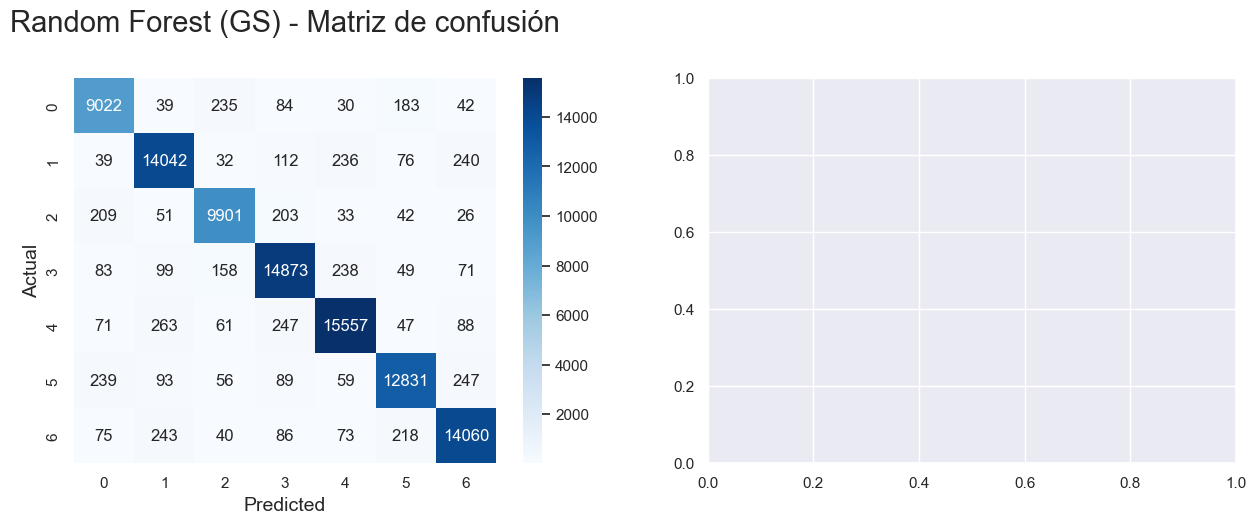

In [35]:
plot_roc_conf_matrix(y_test,X_test, rf_asis, "Random Forest (GS)")

In [36]:
joblib.dump(model_to_save, 'ModelRF.pkl')

['ModelRF.pkl']

In [39]:
try:
  final_model=joblib.load('Grid_Search_rf.pkl')

except:
  try:
    final_model=joblib.load("Grid_Search_rf.pkl")
  except:
    final_model=joblib.load("ModelRF.pkl")
    print(f'modelo {final_model} cargado')

modelo GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__criterion': ['gini'],
                         'randomforestclassifier__min_samples_leaf': [2],
                         'randomforestclassifier__n_estimators': [30]},
             scoring='f1') cargado


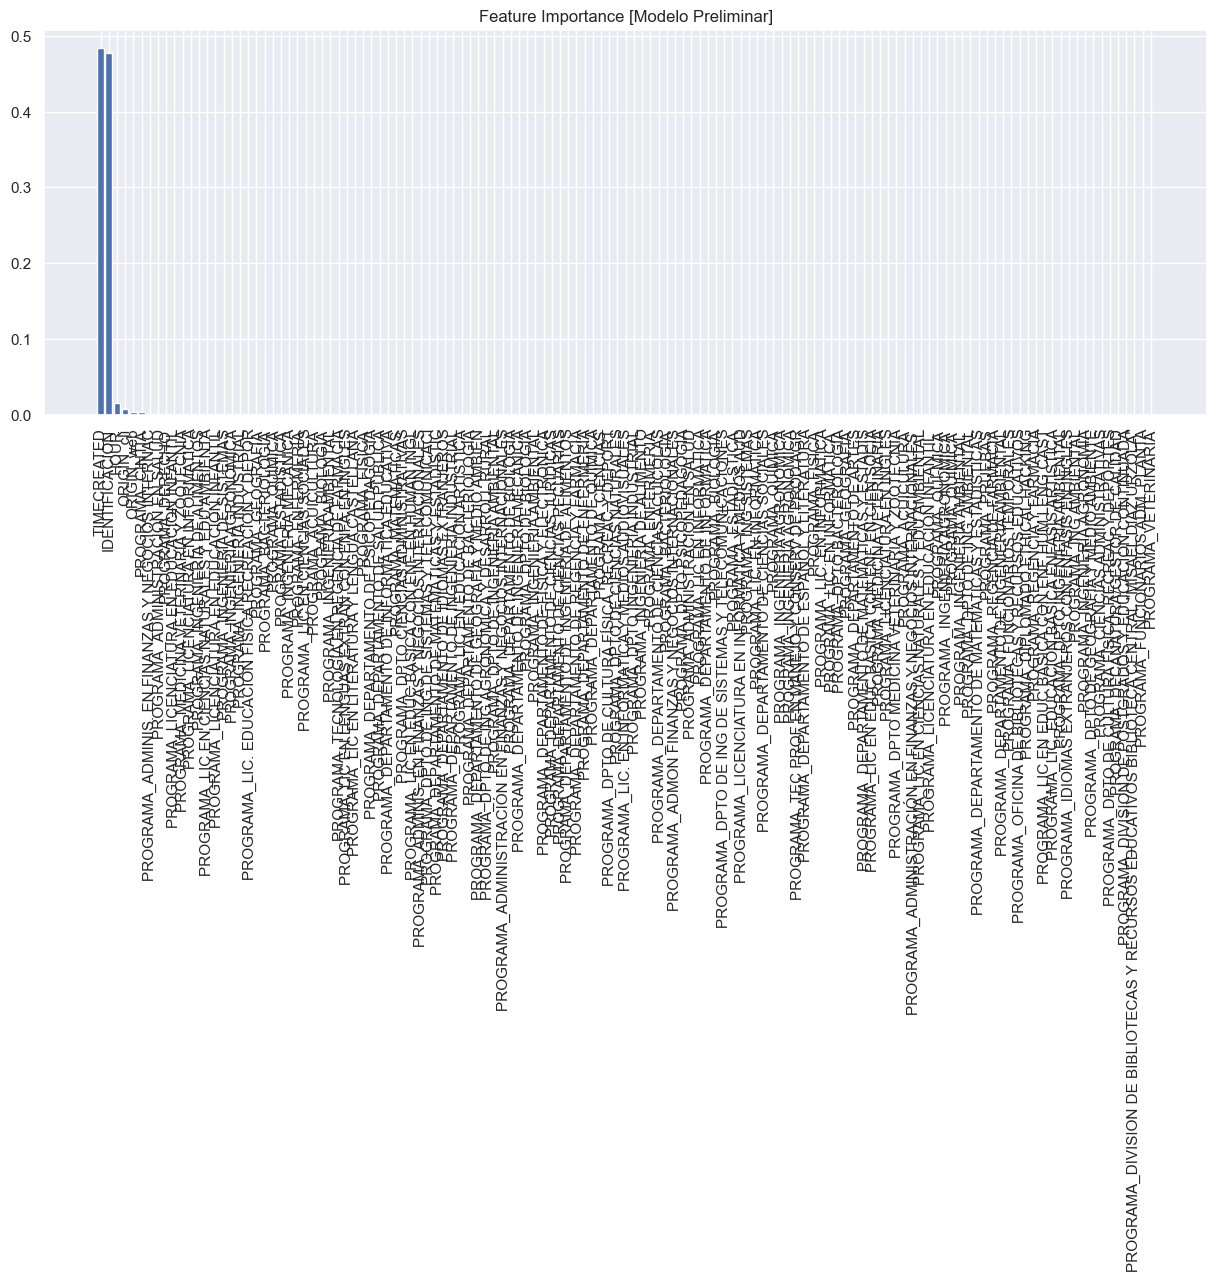

In [40]:
"""
Usando el atributo creado, feature_df_, se genera un gráfico de Feature
Importance del modelo.
"""
plt.figure(figsize=(15, 5))
plt.bar(final_model.feature_df_['Feature'], \
        final_model.feature_df_['Feature Importance'])
_=plt.xticks( rotation=90)
plt.title("Feature Importance [Modelo Preliminar]");

In [42]:
"""
Usando los datos a los que no ha sido expuesto el modelo, y_test y X_test
para simular la exposición a datos a datos nunca vistos.

Se crea un dataframe a partir de estos y realizaremos la predicción
del modelo sobre estos datos y evaluaremos la calidad del modelo.

"""
try:
  test_data_filename="Test_data.csv"
  data_for_test=pd.read_csv(test_data_filename, index_col="Unnamed: 0")

except: 
  test_data_filename='/Test_data.csv'
  data_for_test=pd.read_csv(test_data_filename, index_col="Unnamed: 0")

X_test, y_test=get_X_y(data_for_test,"DAY")
model_test=X_test.copy()
model_test["DAY (Real)"]=y_test
model_test["DAY (Predicted_probability)"]=\
            final_model.predict_proba(model_test.iloc[:,:-1])[:,1]
model_test["DAY (Predicted)"]=\
            final_model.predict(model_test.iloc[:,:-2])

In [43]:
model_test

,IDENTIFICACION,TIMECREATED,HOUR,ORIGIN_cli,ORIGIN_web,PROGRAMA_ACUICULTURA,PROGRAMA_ACUICULURA,PROGRAMA_ADMINIS. EN FINANZAS Y NEGOCIOS INTERNAC,PROGRAMA_ADMINIS. EN FINANZAS Y NEGOCIOS INTERNACIONALES,PROGRAMA_ADMINISTRACION EN SALUD,PROGRAMA_ADMINISTRACIÓN EN FINANZAS Y NEGOCIOS INTERNACIONALES,PROGRAMA_ADMINISTRACIÓN EN FINANZAS Y NEGOCIOS INTERNACIONALES,PROGRAMA_ADMINISTRACIÓN EN SALUD,PROGRAMA_ADMON FINANZAS Y NEGOCIOS INTERNACIONALES,PROGRAMA_BACTERIOLOGIA,PROGRAMA_BACTERIOLOGÍA,PROGRAMA_BIOLOGIA,PROGRAMA_BIOLOGÍA,PROGRAMA_CIENCIAS,PROGRAMA_CIENCIAS ADMINISTRATIVAS,PROGRAMA_CINTIA,PROGRAMA_DECANATURA/GESTOR DE CALIDAD,PROGRAMA_DEPARTAMENTO DE ARTES,PROGRAMA_DEPARTAMENTO DE BACTERIOLOGÍA,PROGRAMA_DEPARTAMENTO DE BIOLOGÍA,PROGRAMA_DEPARTAMENTO DE CIENCIAS ACUÍCOLAS,PROGRAMA_DEPARTAMENTO DE CIENCIAS JURÍDICAS,PROGRAMA_DEPARTAMENTO DE CIENCIAS PECUARÍAS,PROGRAMA_DEPARTAMENTO DE CIENCIAS SOCIALES,PROGRAMA_DEPARTAMENTO DE ENFERMERÍA,PROGRAMA_DEPARTAMENTO DE ESPAÑOL Y LITERATURA,PROGRAMA_DEPARTAMENTO DE FÍSICA Y ELECTRÓNICA,PROGRAMA_DEPARTAMENTO DE GEOGRAFÍA Y MEDIO AMBIEN,PROGRAMA_DEPARTAMENTO DE IDIOMAS EXTRANJEROS,PROGRAMA_DEPARTAMENTO DE INFORMATICA,PROGRAMA_DEPARTAMENTO DE INFORMÁTICA EDUCATIVA,PROGRAMA_DEPARTAMENTO DE INGENIERIA AMBIENTAL,PROGRAMA_DEPARTAMENTO DE INGENIERIA DE ALIMENTOS,PROGRAMA_DEPARTAMENTO DE INGENIERÍA INDUSTRIAL,PROGRAMA_DEPARTAMENTO DE INGENIERÍA MECÁNICA,PROGRAMA_DEPARTAMENTO DE MATEMATICAS Y ESTADISTICAS,PROGRAMA_DEPARTAMENTO DE MATEMÁTICAS Y ESTADÍS,PROGRAMA_DEPARTAMENTO DE MATEMÁTICAS Y ESTADÍSTIC,PROGRAMA_DEPARTAMENTO DE PSICOPEDAGOGÍA,PROGRAMA_DEPARTAMENTO DE QUÍMICA,PROGRAMA_DEPARTAMENTO DE REGENCÍA Y FARMACIA,PROGRAMA_DEPARTAMENTO DE SALUD PÚBLICA,PROGRAMA_DERECHO,PROGRAMA_DIPLOMADO ETHICAL HACKING,"PROGRAMA_DIVISION DE BIBLIOTECAS Y RECURSOS EDUCATIVOS BIBLIOTECA CENTRAL ""MISAEL DIAZ URZOLA""",PROGRAMA_DIVISION DE POSTGRADOS Y EDUCACION CONTINUADA,PROGRAMA_DPTO BACTEROLOGÍA,PROGRAMA_DPTO CIENCIAS ADMINISTRATIVAS,PROGRAMA_DPTO DE BIOLOGÍA,PROGRAMA_DPTO DE CIENCIAS NATURALES,"PROGRAMA_DPTO DE CULTURA FÍSICA, RECREAC Y DEPORT","PROGRAMA_DPTO DE CULTURA FÍSICA, RECREAC Y DEPORTES",PROGRAMA_DPTO DE GEOGRAFIA Y MEDIO AMBIENTE,PROGRAMA_DPTO DE ING AGRONÓMICA Y DESARROLL RURAL,PROGRAMA_DPTO DE ING DE SISTEMAS Y TELECOMUNICACI,PROGRAMA_DPTO DE ING DE SISTEMAS Y TELECOMUNICACIONES,PROGRAMA_DPTO DE ING. AMBIENTAL,PROGRAMA_DPTO DE INGENIERÍA AMBIENTAL,PROGRAMA_DPTO INGENIERÍA AMBIENTAL,PROGRAMA_DPTO INGENIERÍA INDUSTRIAL,PROGRAMA_DPTO MEDICINA VETERINARIA Y ZOOTECNIA,PROGRAMA_DPTO PSICOPEDAGOGÍA,PROGRAMA_ENFERMERIA,PROGRAMA_ENFERMERÍA,PROGRAMA_ESTADÍSTICA,PROGRAMA_ESTADÍ­STICA,PROGRAMA_FISICA,PROGRAMA_FUNCIONARIOS ADM. PLANTA,PROGRAMA_FUNCIONARIOS TEMPORALES,PROGRAMA_FÍSICA,PROGRAMA_GEOGRAFIA,PROGRAMA_GEOGRAFÍA,PROGRAMA_IDIOMAS EXTRANJEROS CON ENFASIS EN INGLES,PROGRAMA_ING AMBIENTAL,PROGRAMA_ING SISTEMAS,PROGRAMA_INGENIERIA AGRONOMICA,PROGRAMA_INGENIERIA AMBIENTAL,PROGRAMA_INGENIERIA AMBIENTAL,PROGRAMA_INGENIERÍA AGRONOMIA,PROGRAMA_INGENIERÍA AGRONOMICA,PROGRAMA_INGENIERÍA AGRONOMICA,PROGRAMA_INGENIERÍA AGRONÓMICA,PROGRAMA_INGENIERÍA AMBIENTAL,PROGRAMA_INGENIERÍA DE ALIMENTO,PROGRAMA_INGENIERÍA DE ALIMENTOS,PROGRAMA_INGENIERÍA DE SISTEMAS,PROGRAMA_INGENIERÍA INDUSTRIAL,PROGRAMA_INGENIERÍA MECÁNICA,PROGRAMA_LIC EN CIENCIAS NATURALES Y EDU AMBIENTA,PROGRAMA_LIC EN CIENCIAS NATURALES Y EDU AMBIENTAL,PROGRAMA_LIC EN CIENCIAS SOCIALES,PROGRAMA_LIC EN EDUC BÁSICA CON ENF EN CIEN SOCIA,PROGRAMA_LIC EN EDUC BÁSICA CON ENF EN HUMAN INGL,PROGRAMA_LIC EN EDUC BÁSICA CON ENF HUM LENG CAST,PROGRAMA_LIC EN EDUCACION ARTISTICA,PROGRAMA_LIC EN INFORMÁTICA,PROGRAMA_LIC EN LENGUAS EXTRAN CON ENFA EN INGLES,PROGRAMA_LIC EN LITERATURA Y LENGUA CASTELLANA,PROGRAMA_LIC. EDUCACIÓN BÁSICA ÉNFASIS ARTÍSTICA,PROGRAMA_LIC. EDUCACIÓN FÍSICA RECREACIÓN Y DEPOR,PROGRAMA_LIC. EN INFORMATICA,PROGRAMA_LIC. EN INFORMATICA Y MEDIOS AUDIOVISUALES,PROGRAMA_LIC. EN INFORMÁTICA,PROGRAMA_LIC. EN INFORMÁTICA,PROGRAMA_LICENCIATURA EN EDUCAC

In [44]:
model_test.iloc[:,-3:]

,DAY (Real),DAY (Predicted_probability),DAY (Predicted)
32715,JUEVES,0.053039,MIERCOLES
105620,MIERCOLES,0.014558,MIERCOLES
265605,VIERNES,0.068021,VIERNES
278086,SABADO,0.000000,SABADO
284078,DOMINGO,0.000000,DOMINGO
...,...,...,...
136164,MARTES,0.000000,MARTES
345870,MIERCOLES,0.000000,MIERCOLES
235226,LUNES,0.011427,LUNES
440287,VIERNES,0.000000,VIERNES
